In [3]:
import numpy as np
import copy
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles

# Реализация алгоритма

In [1]:
def Kmeans(D, N, centers, init=0):
    cur_centrs = np.zeros([centers, 2])
    y = np.zeros(N)
    if init == 0: #инициализируем центроиды случайными элементами выборки
        rnd_idx = np.random.choice(np.arange(N), centers, replace=False)
        cur_centrs = D[rnd_idx]
        y[rnd_idx] = np.arange(centers) + 1
    elif init == 1:#инициализируем центроиды случайными точками внутри выборки
        cur_centrs[:, 0] = np.random.ranf(centers) * (np.max(D[:, 0]) - np.min(D[:, 0])) + np.min(D[:, 0])
        cur_centrs[:, 1] = np.random.ranf(centers) * (np.max(D[:, 1]) - np.min(D[:, 1])) + np.min(D[:, 1])
    
    count1 = 0    
    while True:
        count1 += 1
        for i in range(N):
            y[i] = np.argmin((np.sum(np.square(cur_centrs - D[i]), axis=1))) + 1
        prev_centrs = copy.deepcopy(cur_centrs)
        for i in range(centers):
            sum = np.zeros(2)
            count = 0
            for j in range(N):
                if y[j] == i + 1:
                    count += 1
                    sum += D[j]
            if count != 0:
                sum /= count
            cur_centrs[i] = sum 
        if np.all(np.equal(cur_centrs, prev_centrs)):
            break
    print("Количество итераций =",count1)
    return y

# Исследование стратегии инициализации

# Реализовано 2 стратегии:
# 1. инициализация случайными элементами выборки: init = 0
# 2. инициализация случайными точками внутри выборки: init = 1

# Работа на шаровых кластерах:

Количество итераций = 3


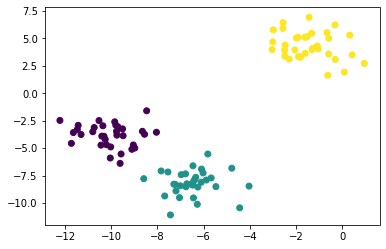

In [24]:
#init == 0
N = 100
centrs = 3
D, x = make_blobs(n_samples=N, cluster_std=1.2, centers=centrs, random_state=1)
y = Kmeans(D, N, centrs, init=0)
plt.scatter(D[:, 0], D[:, 1], c=y)

Количество итераций = 5


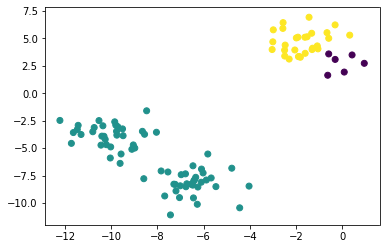

In [27]:
#init == 1
y = Kmeans(D, N, centrs, init=1)
plt.scatter(D[:, 0], D[:, 1], c=y)

# Инициализация элементами выборки лучше

# 2. Для каких задач подходит не подходт:

# Работа на лунах:

Количество итераций = 3


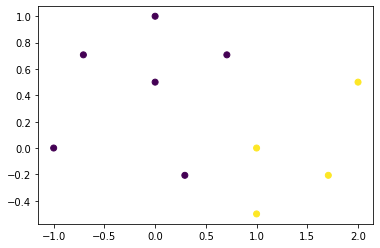

In [7]:
N = 10
centrs = 2
D, x = make_moons(n_samples=N, noise=0, random_state=1)
#init == 0
y = Kmeans(D, N, centrs, init=1)
plt.scatter(D[:, 0], D[:, 1], c=y)

Количество итераций = 5


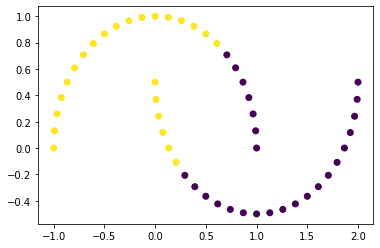

In [8]:
N = 50
centrs = 2
D, x = make_moons(n_samples=N, noise=0, random_state=1)
#init == 0
y = Kmeans(D, N, centrs, init=1)
plt.scatter(D[:, 0], D[:, 1], c=y)

Количество итераций = 5


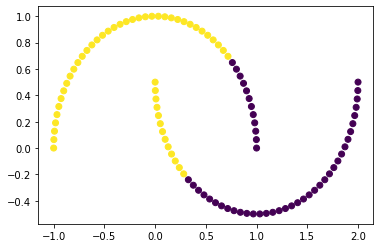

In [15]:
N = 100
centrs = 2
D, x = make_moons(n_samples=N, noise=0, random_state=1)
#init == 0
y = Kmeans(D, N, centrs, init=1)
plt.scatter(D[:, 0], D[:, 1], c=y)

Количество итераций = 5


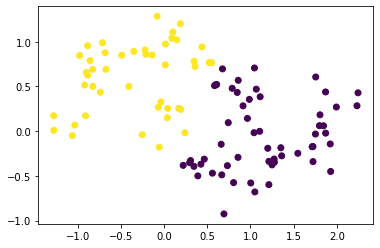

In [21]:
N = 100
centrs = 2
D, x = make_moons(n_samples=N, noise=0.16, random_state=1)
#init == 0
y = Kmeans(D, N, centrs, init=1)
plt.scatter(D[:, 0], D[:, 1], c=y)

# На лунах получаемый результат не совпадает с ожидаемым

# Работа на окружностях

Количество итераций = 7


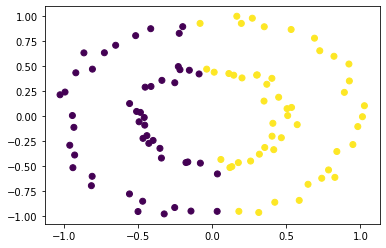

In [22]:
N = 100
centrs = 2
D, x = make_circles(n_samples=N, noise=0.05, random_state=1, factor=0.5)
#init == 0
y = Kmeans(D, N, centrs, init=1)
plt.scatter(D[:, 0], D[:, 1], c=y)

# На окружностях получаемый результат не совпадает с ожидаемым

# Хорошо работает только на шаровых кластерах

# 3. Стратегия выбора числа кластеров

# Можно использовать Elbow Method

In [207]:
def Elbow(X, N, maxk):
    distor = np.zeros(maxk)
    for i in range(maxk):
        z = Kmeans(X, N, i + 1)
        res = 0
        for j in range(i + 1):
            X_tmp = X[z == j + 1]
            #print(z == j + 1)
            sum = 0
            for k in range(len(X_tmp) - 1):
                for l in range(k, len(X_tmp)):
                    sum += np.sqrt(np.sum(np.square(X_tmp[k] - X_tmp[l])))
            res += sum / len(X_tmp)
        distor[i] = res
    plt.plot(range(maxk), distor)

Количество итераций = 6
Количество итераций = 2
Количество итераций = 2
Количество итераций = 2
Количество итераций = 5
Количество итераций = 7
Количество итераций = 6
Количество итераций = 4
Количество итераций = 8
Количество итераций = 8
Количество итераций = 5


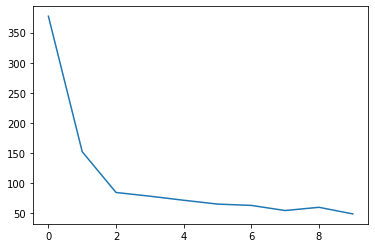

In [208]:
N = 100
centrs = 3
D, x = make_blobs(n_samples=N, cluster_std=1.1, centers=centrs, random_state=1)
y = Kmeans(D, N, centrs, init=0)
Elbow(D, N, 10)

Количество итераций = 4
Количество итераций = 2
Количество итераций = 2
Количество итераций = 3
Количество итераций = 2
Количество итераций = 9
Количество итераций = 4
Количество итераций = 5
Количество итераций = 7
Количество итераций = 8
Количество итераций = 8


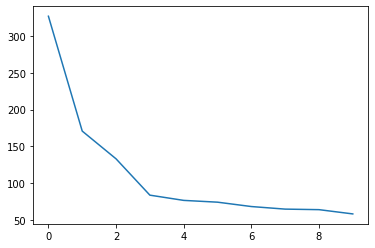

In [210]:
N = 100
centrs = 4
D, x = make_blobs(n_samples=N, cluster_std=1.1, centers=centrs, random_state=1)
y = Kmeans(D, N, centrs, init=0)
Elbow(D, N, 10)

Количество итераций = 4
Количество итераций = 2
Количество итераций = 5
Количество итераций = 5
Количество итераций = 5
Количество итераций = 7
Количество итераций = 6
Количество итераций = 4
Количество итераций = 7
Количество итераций = 7
Количество итераций = 5


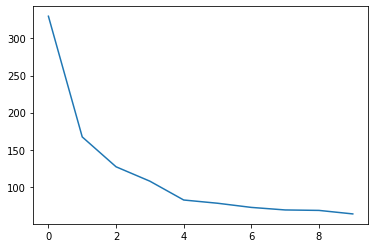

In [211]:
N = 100
centrs = 5
D, x = make_blobs(n_samples=N, cluster_std=1.1, centers=centrs, random_state=1)
y = Kmeans(D, N, centrs, init=0)
Elbow(D, N, 10)

# На графике видна точка, соответствующая оптимальному числу кластеров

# 4. Зависимость времени работы от объема данных

In [174]:
%%time
N = 100
centrs = 5
D, x = make_blobs(n_samples=N, cluster_std=1.1, centers=centrs, random_state=1)
y = Kmeans(D, N, centrs, init=0)

Количество итераций = 9
CPU times: user 39.3 ms, sys: 4.39 ms, total: 43.7 ms
Wall time: 38.3 ms


In [175]:
%%time
N = 500
centrs = 5
D, x = make_blobs(n_samples=N, cluster_std=1.1, centers=centrs, random_state=1)
y = Kmeans(D, N, centrs, init=0)

Количество итераций = 6
CPU times: user 131 ms, sys: 31.9 ms, total: 163 ms
Wall time: 128 ms


In [176]:
%%time
N = 2000
centrs = 5
D, x = make_blobs(n_samples=N, cluster_std=1.1, centers=centrs, random_state=1)
y = Kmeans(D, N, centrs, init=0)

Количество итераций = 18
CPU times: user 865 ms, sys: 69.6 ms, total: 935 ms
Wall time: 849 ms


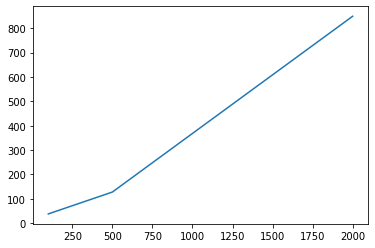

In [182]:
#результаты на моем ПК
x = [100, 500, 2000]
y = [38.3, 128, 849]
plt.plot(x, y)

# Зависимость почти линейная

# 5. Матрица попарных расстояний

Количество итераций = 2


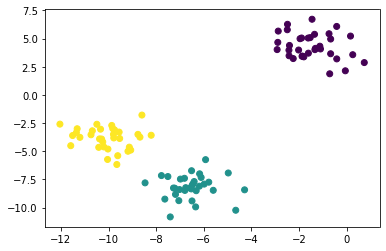

In [218]:
N = 100
centrs = 3
D, x = make_blobs(n_samples=N, cluster_std=1.1, centers=centrs, random_state=1)
y = Kmeans(D, N, centrs, init=0)
plt.scatter(D[:, 0], D[:, 1], c=y)
def pair_dist_matr(D):    
    len_arr = np.zeros([len(D), len(D)])
    for i in range(len(D)):
        for j in range(i, len(D)):
            len_arr[i][j] = np.sqrt(np.sum(np.square(D[i] - D[j])))
            len_arr[j][i] = np.sqrt(np.sum(np.square(D[i] - D[j])))
    return len_arr

# Матрица неотсортированного массива данных

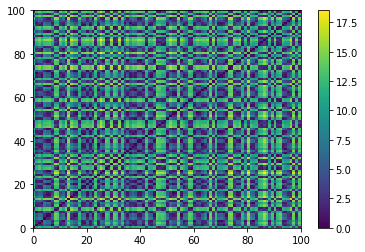

In [219]:
plt.pcolormesh(pair_dist_matr(D))
plt.colorbar()
plt.xlim([0,N])
plt.ylim([0,N])
plt.show()

# Матрица массива, отсортированного по столбцу признаков

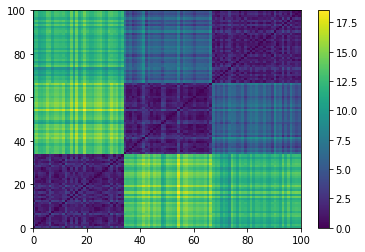

In [220]:
D_sort = D[y.argsort()]
plt.pcolormesh(pair_dist_matr(D_sort))
plt.colorbar()
plt.xlim([0,N])
plt.ylim([0,N])
plt.show()